In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
f = open('inputs/day06.txt')
data = f.read()

In [3]:
print(data)

135, 127
251, 77
136, 244
123, 169
253, 257
359, 309
100, 247
191, 323
129, 323
76, 284
69, 56
229, 266
74, 216
236, 130
152, 126
174, 319
315, 105
329, 146
288, 51
184, 344
173, 69
293, 80
230, 270
279, 84
107, 163
130, 176
347, 114
133, 331
237, 300
291, 283
246, 297
60, 359
312, 278
242, 76
81, 356
204, 291
187, 335
176, 98
103, 274
357, 144
314, 118
67, 196
156, 265
254, 357
218, 271
118, 94
300, 189
290, 356
354, 91
209, 334


In [4]:
class Grid:
    def __init__(self, input):
        self.input = input
        self.coords = self.parse_input(input.split('\n'))
        self.areas = dict.fromkeys(self.coords, 0)
        self.grid = self.create_grid(self.coords)
        
    def parse_input(self, input):
        return [tuple([int(d) for d in line.split(',')]) for line in input]
    
    def create_grid(self, coords):
        coords_df = pd.DataFrame(coords, columns=['X', 'Y'])
        grid = pd.DataFrame(np.zeros((max(coords_df.Y)+1, max(coords_df.X)+1)))
        for i, c in enumerate(coords):
            grid.loc[c[1], c[0]] = i+1
        return grid
    
    def manhattan_dist(self, c1, c2):
        return abs(c1[0] - c2[0]) + abs(c1[1] - c2[1])
    
    def closest_coord(self, coord):
        dists = []
        min_dist = np.inf
        min_coord = None
        for c in self.coords:
            dist = self.manhattan_dist(c, coord)
            dists.append(dist)
            if dist < min_dist:
                min_dist = dist
                min_coord = c
        dists = pd.Series(dists)
        min_dist = dists.min()
        if (dists == min_dist).sum() == 1:
            return min_coord
        else:
            return None
        
    def map_areas(self):
        s = self.grid.shape
        for j in range(s[0]):
            for i in range(s[1]):
                closest_coord = self.closest_coord((i,j))
                if closest_coord is not None:
                    val = self.coords.index(closest_coord)
                    self.grid.loc[j,i] = val + 1
                    self.areas[closest_coord] += 1
                    
    def check_boundaries(self):
        self.is_infinite = dict.fromkeys(self.coords, False)
        s = self.grid.shape
        # check left/right
        for j in range(s[0]):
            left = int(self.grid.loc[j, 0])
            if left > 0:
                self.is_infinite[self.coords[left-1]] = True
            right = int(self.grid.loc[j, s[1]-1])
            if right > 0:
                self.is_infinite[self.coords[right-1]] = True
        # check top/bottom
        for i in range(s[1]):
            top = int(self.grid.loc[0, i])
            if top > 0:
                self.is_infinite[self.coords[top-1]] = True
            btm = int(self.grid.loc[s[0]-1, i])
            if btm > 0:
                self.is_infinite[self.coords[right-1]] = True

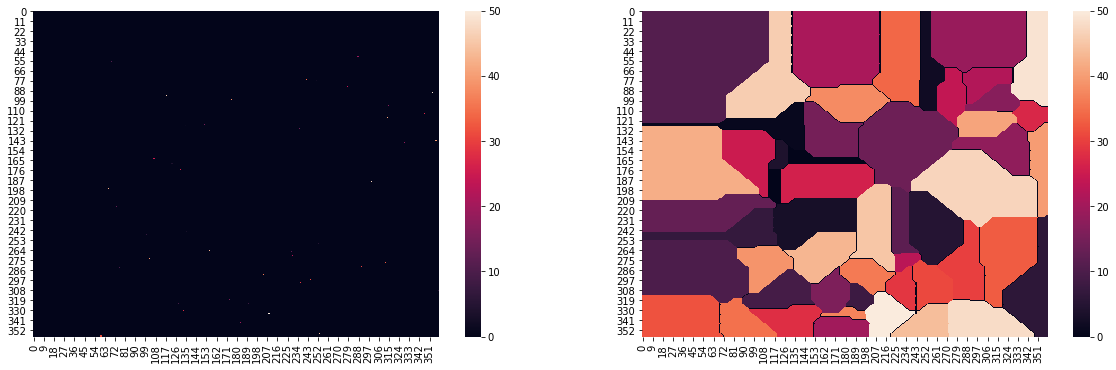

In [5]:
g = Grid(data)

fig, axes = plt.subplots(ncols=2, figsize=(20,6))

sns.heatmap(g.grid, ax=axes[0])
g.map_areas()
sns.heatmap(g.grid, ax=axes[1])

In [6]:
g.check_boundaries()

In [7]:
pd.Series(list(g.areas.values()))[~pd.Series(list(g.is_infinite.values()))].max()

5975